In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.image as mpimg
import numpy as np
%matplotlib inline
#导入必要的库

In [2]:
from google.colab import drive
drive.mount('/content/drive')
#链接文件原始目录

Mounted at /content/drive


In [3]:
#此处可自由修改文件目录
df = pd.read_csv('/content/drive/MyDrive/连接关系和点权重/开封边属性.csv')#获取城市的边属性
df_2 = pd.read_csv('/content/drive/MyDrive/连接关系和点权重/开封点属性.csv')#获取城市的节点属性

# 导入并获取图的基本信息

In [4]:
# 过滤空节点
df = df.dropna(subset=["前一节点", "后一节点"])
G = nx.from_pandas_edgelist(df,"前一节点","后一节点", edge_attr=True, create_using=nx.MultiGraph())  #edge_attr=True,边的属性信息也要导入

In [5]:
# 读取CSV文件
df_links = df
df_attributes = df_2

# 创建一个空的多重图
G = nx.MultiGraph()

# 添加节点和边到多重图
for _, row in df_links.iterrows():
    node1 = row['前一节点']
    node2 = row['后一节点']
    edge_attr = row['线路名称']
    if pd.notna(node1) and pd.notna(node2):
        G.add_edge(node1, node2, attribute=edge_attr)


# 添加节点属性到多重图
for _, row in df_attributes.iterrows():
    node = row['节点名称']
    attr1 = row['区域属性']
    attr2 = row['线路']
    attr3 = row['500M内文保单位/古迹遗址/宗祠故地的个数']

    if pd.notna(node):
        G.add_node(node)
        G.nodes[node]['区域属性'] = attr1
        G.nodes[node]['线路'] = attr2
        G.nodes[node]['500M内文保单位/古迹遗址/宗祠故地的个数'] = attr3

**获取节点数量信息**

In [6]:
# 获取图G的节点数量
num_nodes = G.number_of_nodes()

print("图G的节点数量为:", num_nodes)

图G的节点数量为: 381


# 获取邻接矩阵的方式

In [7]:
# 获取邻接矩阵
adj_matrix = nx.adjacency_matrix(G)
# 将邻接矩阵转换为NumPy数组
adj_array = adj_matrix.toarray()

#获取节点编号列表
node_ids = list(G.nodes())

# 构建邻接矩阵
adj_matrix = nx.adjacency_matrix(G, nodelist=node_ids)

# 将邻接矩阵转换为DataFrame
df1 = pd.DataFrame(adj_matrix.toarray(), index=node_ids, columns=node_ids)

# 保存DataFrame到CSV文件
#df1.to_csv('/content/drive/MyDrive/python 研究/XXXXX', index=True, header=True)

# 获取节点权重的方法

In [8]:
node_attributes = G.nodes.data()
target_attribute = '500M内文保单位/古迹遗址/宗祠故地的个数'
attribute=[]

In [9]:
# 遍历节点属性，获取指定属性的值
for node, attributes in node_attributes:
    if target_attribute in attributes:
        attribute_value = attributes[target_attribute]

        attribute.append(attribute_value)
    else:
        attribute.append(-1)

    #print("节点:", node)
    #print("属性:", target_attribute, "=", attribute_value)
    #print()

In [10]:
#获取权重
attribute=np.array(attribute)
#attribute.shape
#打印权重
#print(attribute)

# 获取区域属性的方法

In [11]:
node_attributes = G.nodes.data()
target_regional_attribute = '区域属性'
regional_attribute=[]

In [12]:
# 遍历节点属性，获取指定属性的值
for node, attributes in node_attributes:
    if target_regional_attribute in attributes:
        attribute_value = attributes[target_regional_attribute]

        regional_attribute.append(attribute_value)
    else:
        regional_attribute.append(-1)

    #print("节点:", node)
    #print("属性:", target_regional_attribute, "=", attribute_value)
    #print()

In [13]:
#将文本信息转化成独热编码
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# 创建LabelEncoder
le = LabelEncoder()
# 对district_names进行编码
district_encoded = le.fit_transform(regional_attribute)

# 创建OneHotEncoder
ohe = OneHotEncoder()
# 对编码后的结果进行独热编码
district_onehot = ohe.fit_transform(district_encoded.reshape(-1,1)).toarray()

# 将图的边转换为edge_index 并创建节点映射表

In [14]:
 #获取图的边列表
edge_list = list(G.edges())

# 将边列表转换为 edge_index
edge_index = np.array(edge_list).T

# 打印结果
edge_index= np.array(edge_index)
edge_index

array([['铁塔公园', '铁塔公园', '铁塔公园', ..., '龙亭北路桥', '铁塔西街桥', '解放路桥'],
       ['天伦苑', '天伦苑', '河大附中', ..., '铁塔西街桥', '解放路桥', '铁塔湖']], dtype='<U14')

In [15]:
#提取纯数字的edge_index
# 获取 NetworkX 内部的节点编号，这串代码会直接创建一个新的图，并且替换掉里面的所有文字，变成数字
G2 = nx.convert_node_labels_to_integers(G)
# 获取图的边列表
edge_list_number = list(G2.edges())
# 将边列表转换为 edge_index
edge_index_number = np.array(edge_list_number).T
# 打印结果
edge_index_number= np.array(edge_index_number)
print(edge_index_number)
print(edge_index_number.shape)

#shape 格式与上方一致即可进行下一步

[[  0   0   0 ... 377 378 379]
 [  1   1  40 ... 378 379 380]]
(2, 703)


**创建节点字典映射**

In [16]:
# 获取 NetworkX 内部的节点编号，这串代码会直接创建一个新的图，并且替换掉里面的所有文字，变成数字
G_int_labels = nx.convert_node_labels_to_integers(G)


In [17]:
#dir(G_int_labels)   #查看G_int_labels 支持的后缀
G_int_labels.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 

In [18]:
list1=G_int_labels.nodes
list1=np.array(list1)
list1

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [19]:
list_1=G.nodes.data()
list_1=np.array(list_1)


list_2=list_1
list2 = []  # 创建一个空列表，用于存储遍历结果

for item in list_2:
    list2.append(item[0])

list2=np.array(list2)

In [20]:
#list2#此处可以查看list2
list1 = list1
list2 = list2
mapping_dict = { }  # 创建一个空字典

for i in range(len(list1)):
    key = str(list1[i])  # 将整数转换为字符串作为键
    value = list2[i]  # 节点名称作为值
    mapping_dict[key] = value

# 统计已有的信息

**邻接矩阵**

In [23]:
#邻接矩阵
#print(adj_array)
#print(adj_array.shape)

**500M内古迹文保单位的权重**

In [22]:
#500m内古迹的数量，作为权重
print(attribute)
print(attribute.shape)

[3. 0. 0. 4. 4. 6. 9. 4. 5. 3. 3. 6. 5. 1. 1. 2. 3. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 3. 6. 6. 5. 4. 3. 0. 0. 0. 3. 3. 3. 4. 4. 4. 6. 7. 6. 1. 1.
 0. 0. 0. 3. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 3. 5. 6. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 3. 7. 2. 1. 1. 0. 2. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 3. 0. 0. 3. 4. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 5. 3. 2. 6. 0. 1. 4. 0.
 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 3. 6. 5. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 4. 0. 1. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 6. 1. 0. 0. 0. 0. 0. 0. 6. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 5. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [24]:
#检查权重是否都大于等于0，如果不是，那么权重矩阵有问题。
arr = attribute

if (arr >= 0).all():
  print('True')
else:
  print('False')

True


In [25]:
#此处需要将古迹数量的节点进行归类，可以选择3类4类都可以，这个归类会影响最终结果。这是计算机在向你询问边界是什么样子的。
#注意调整range的值
attribute_3=[]
for i in range(len(attribute)):
  if attribute[i]<=2 :
    attribute_3.append(0)
  #elif attribute[i]<=6:
    #attribute_3.append(1)
  else:
    attribute_3.append(2)


attribute_3=np.array(attribute_3)

**加持独热编码后的古迹数量权重**

In [26]:
district_onehot=np.array(district_onehot)#将独热编码转换为np数组
matrix_onehot_unite= np.concatenate((adj_array, district_onehot), axis=1)#将邻接矩阵和独热编码拼接
matrix_onehot_unite=np.concatenate((matrix_onehot_unite, attribute.reshape(-1,1)), axis=1)#将邻接矩阵和   独热编码   和节点古建筑属性   拼接
matrix_onehot_unite.shape

(381, 387)

**节点和数字的映射关系**

In [ ]:
#节点和数字间的映射关系

#print(mapping_dict)
#print(len(mapping_dict))

In [30]:
#节点和数字间的映射关系(翻转)
reversed_dict = {value: key for key, value in mapping_dict.items()}
#print(reversed_dict)

**掩码的制作**

In [31]:
total_nodes = len(attribute_3)#此处相比福州作了改进，我们直接用古迹数量权重列表的长度作为节点总数量
num_false = 120

mask_1 = np.array([False] * num_false + [True] * (total_nodes - num_false))
np.random.shuffle(mask_1)

In [46]:
print(mask_1)
print(mask_1.shape)

[ True False False False  True False False  True  True False  True  True
  True  True  True  True  True  True  True  True  True False  True  True
 False  True  True False False False  True  True False  True  True False
  True  True  True False False  True  True  True  True  True  True  True
 False False False  True  True  True False False  True False False  True
  True  True  True  True  True  True False  True  True  True  True  True
  True  True  True False  True  True False  True False False False  True
  True False  True  True  True  True  True False  True False False  True
  True False False  True  True  True  True False  True  True  True  True
 False False False  True False False  True  True False  True  True  True
  True  True  True  True  True False  True False  True  True  True False
 False  True False  True False  True  True  True  True  True  True  True
  True False  True  True  True  True  True  True False  True  True False
  True  True  True False  True  True  True  True  T

# **构建图神经网络之前的准备工作**

In [32]:
# Install required packages.

import os
import torch
os.environ['TORCH'] = torch.__version__
print(torch.__version__)

!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git

# Helper function for visualization.
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

2.1.0+cu121
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 95.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 47.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [33]:
from torch_geometric.data import Data

# 准备邻接矩阵和节点标签  attribute_unite
adj_matrix = adj_array  # 邻接矩阵，可以是二维稀疏张量或二维numpy数组
node_labels = attribute_3 # 节点标签，可以是一维张量或一维numpy数组  numeric_array   attribute  attribute_3
node_labels_2=attribute
matrix_onehot_unite_1=matrix_onehot_unite
# 创建一个data对象
data = Data(x=torch.tensor(adj_matrix), edge_index=torch.tensor(adj_matrix.nonzero()), y=torch.tensor(node_labels) ,z=torch.tensor(node_labels_2) ,b=torch.tensor(matrix_onehot_unite_1), train_mask=torch.tensor(mask_1))

<ipython-input-33-f81ce79df024>:9: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:261.)
  data = Data(x=torch.tensor(adj_matrix), edge_index=torch.tensor(adj_matrix.nonzero()), y=torch.tensor(node_labels) ,z=torch.tensor(node_labels_2) ,b=torch.tensor(matrix_onehot_unite_1), train_mask=torch.tensor(mask_1))


**设计一个绘图函数**

In [34]:
def visualize_graph(G, color):
    plt.figure(figsize=(7,7))
    #plt.xticks([])
    #plt.yticks([])
    nx.draw_networkx(G, pos=nx.spring_layout(G, seed=42), with_labels=False,
                     node_color=color, cmap="Set2")
    plt.show()

**设计一个能将嵌入可视化的函数**

In [35]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
def visualize_embedding(h, color, epoch=None, loss=None):
    plt.figure(figsize=(7,7))
    #plt.xticks([])
    #plt.yticks([])
    h = h.detach().cpu().numpy()
    scatter=plt.scatter(h[:, 0], h[:, 5], s=40, c=color, cmap="Set2")#Set2  cool


    if epoch is not None and loss is not None:
        plt.xlabel(f'Epoch: {epoch}, Loss: {loss.item():.4f}', fontsize=16)
    plt.colorbar(scatter)
    plt.show()
#在这里需要注意h的维度有6个，而我们只能选择2个可视化


**开始可视化**

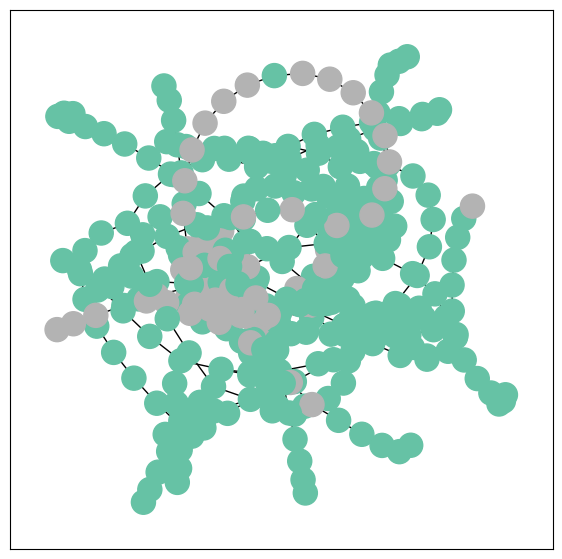

In [36]:
#开始可视化
#这步是必要的，请观察是否有独立的节点。没有就是正常。
from torch_geometric.utils import to_networkx

G = to_networkx(data, to_undirected=True)
visualize_graph(G, color=data.y)

# 构建图神经网络并开始训练

In [37]:
import torch
from torch.nn import Linear
from torch_geometric.nn import GCNConv
#记得修改输入端的参数，必须保持一致

class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        torch.manual_seed(123)
        self.conv1 = GCNConv(len(data.b.T), 128)
        self.conv2 = GCNConv(128, 8)
        self.conv3 = GCNConv(8, 6)
        self.classifier = Linear(6, 6)

    def forward(self, x, edge_index):
        h = self.conv1(x, edge_index)
        h = h.tanh()
        h = self.conv2(h,  edge_index )
        h = h.tanh()
        h = self.conv3(h, edge_index)
        h = h.tanh()  # Final GNN embedding space.

        # Apply a final (linear) classifier.
        out = self.classifier(h)

        return out, h

model = GCN()
print(model)

GCN(
  (conv1): GCNConv(387, 128)
  (conv2): GCNConv(128, 8)
  (conv3): GCNConv(8, 6)
  (classifier): Linear(in_features=6, out_features=6, bias=True)
)


**观察初代嵌入**

Embedding shape: [381, 6]


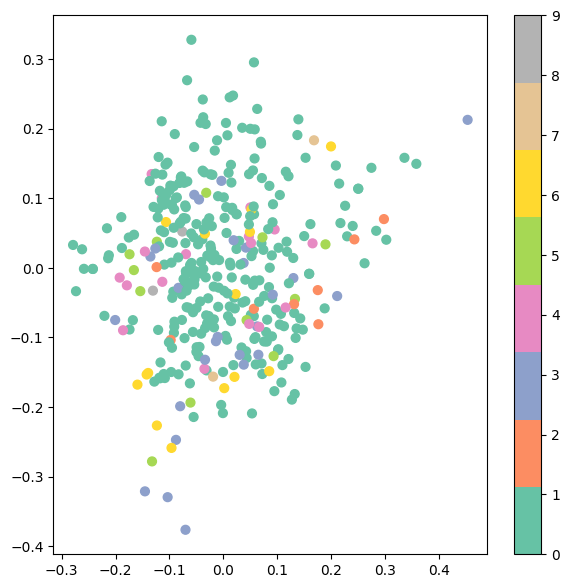

In [38]:
model = GCN()

_, h = model(data.b.float(), data.edge_index)#data.x.float()

print(f'Embedding shape: {list(h.shape)}')

visualize_embedding(h, color=data.z)

**开始训练模型**

In [39]:
import time
from IPython.display import Javascript  # Restrict height of output cell.

display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 430})'''))

model = GCN()
criterion = torch.nn.CrossEntropyLoss()  # Define loss criterion.
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)  # Define optimizer.

def train(data):
    optimizer.zero_grad()  # Clear gradients.
    out, h = model(data.b.float() ,data.edge_index)  # Perform a single forward pass.
    loss = criterion(out[data.train_mask], data.y[data.train_mask].long())  # Compute the loss solely based on the training nodes.
    loss.backward()  # Derive gradients.
    optimizer.step()  # Update parameters based on gradients.
    return loss, h
loss_remember=[]
for epoch in range(501):
    loss, h = train(data)
    loss_remember.append(loss)
    if epoch % 10 == 0:
        visualize_embedding(h, color=data.z, epoch=epoch, loss=loss)
        time.sleep(0.3)

Output hidden; open in https://colab.research.google.com to view.

Text(0, 0.5, 'Loss')

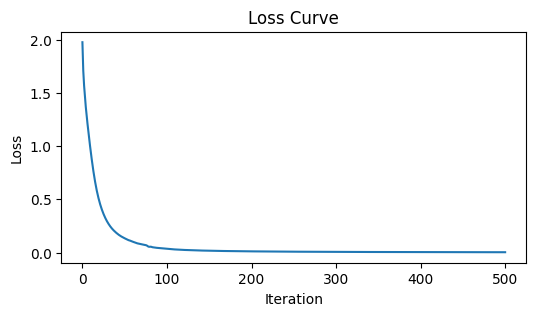

In [40]:
#绘制损失函数变化曲线
for i in range(len(loss_remember)):

    loss_remember[i]=loss_remember[i].detach().numpy()

import matplotlib.pyplot as plt
import numpy as np
losses=loss_remember
plt.figure(figsize=(6,3))
plt.plot(losses)
plt.title("Loss Curve")
plt.xlabel("Iteration")
plt.ylabel("Loss")

In [41]:
#获取最终的嵌入值
print(h)
print(h.shape)

tensor([[ 0.9971, -0.9954, -0.9982,  0.9992, -0.9995, -0.9991],
        [ 0.9992, -0.9985, -0.9995,  0.9999, -0.9999, -0.9998],
        [ 0.9944, -0.9914, -0.9964,  0.9981, -0.9987, -0.9978],
        ...,
        [ 0.9982, -0.9970, -0.9989,  0.9996, -0.9997, -0.9995],
        [ 0.9982, -0.9970, -0.9989,  0.9996, -0.9997, -0.9995],
        [ 0.9976, -0.9960, -0.9985,  0.9994, -0.9996, -0.9993]],
       grad_fn=<TanhBackward0>)
torch.Size([381, 6])


# 获取核心区的位置信息

In [42]:
#此处可能需要手动修改参数
H=[]
for  i in range(len(attribute_3)):
  if h[i][5]<=-0  :#and h[i][1]>=-1
    H.append(i)
  else:
     pass

H=np.array(H)

In [43]:
#获取具体的核心区代表数字
H

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        16,  29,  30,  31,  32,  33,  37,  38,  39,  40,  41,  42,  43,
        44,  45,  51, 101, 102, 103, 125, 126, 127, 136, 155, 156, 159,
       160, 184, 185, 186, 187, 188, 189, 190, 191, 216, 217, 218, 251,
       270, 278, 288, 319, 343, 344, 345, 350, 351, 353, 354, 355, 357,
       358, 359, 366, 367, 368, 369, 370, 371, 372, 375, 376, 377, 378,
       379, 380])

In [44]:
#统计具体的核心节点数量
H.shape

(80,)

In [45]:
new_list = []
for key in H:
  new_list.append(mapping_dict[str(key)])
new_list

['铁塔公园',
 '天伦苑',
 '龙亭区委·区政府',
 '体育场',
 '文昌后街',
 '天波杨府·公交三公司',
 '清明上河园',
 '法院街东口·兴盛德驿站店',
 '龙亭公园',
 '新街口·兴盛德花生老店',
 '中山路·行宫角',
 '大纸坊街口',
 '延庆观',
 '二十七中',
 '相国寺',
 '小纸坊街口',
 '泰山庙',
 '包公湖南路',
 '包公湖南路·迎宾路',
 '包公祠',
 '鼓楼区法院',
 '铁塔公园·公交一公司',
 '河大附中',
 '河大附中(世宇文慧苑)',
 '北道门',
 '右司官口',
 '东司门',
 '学院门',
 '汴京桥',
 '开封市眼病医院',
 '行宫角',
 '鼓楼广场',
 '西环城路晋安路',
 '西司桥',
 '行宫角(宝视达眼镜)',
 '内环路·公交五公司',
 '西环路·向阳路',
 '明伦街',
 '河大老校区东门',
 '河大仁和公寓',
 '城隍庙后街',
 '西门大街·迎宾路',
 '新街口',
 '书店街北口',
 '内环路公交五公司',
 '三教堂街·体育公园',
 '曹门',
 '仪表厂生活区',
 '新街口兴盛德花生老店',
 '白衣阁',
 '石桥口',
 '自由路·解放路口',
 '大纸坊街',
 '天波杨府',
 '内环路',
 '豆腐营街',
 '新街口(西大街)',
 '东司门(东大街)',
 '公交临时停车站(开封城墙)',
 '国土执法稽查大队',
 '汴京桥中石化加油站',
 '内环东路·东棚板街',
 '内环东路曹门大街',
 '弓箭西街向阳路',
 '弓箭西街·大梁路',
 '法院街西口',
 '龙亭北路内顺城路',
 '包公湖',
 '西司桥(桥)',
 '西大寺西南人行桥',
 '西大寺西北桥(板桥)',
 '西门基督教堂东北桥',
 '开封市田家炳实验中学西南桥',
 '开封市田家炳实验中学西人行桥',
 '杨家湖',
 '潘家湖',
 '龙亭北路桥',
 '铁塔西街桥',
 '解放路桥',
 '铁塔湖']

# 三维可视化

**此处的代码可能需要手动修改**

In [ ]:
B=data.y
B.shape

torch.Size([381])

In [ ]:
# 将NumPy数组转换为Python列表
h_1= h.tolist()
B_1=B.tolist()


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

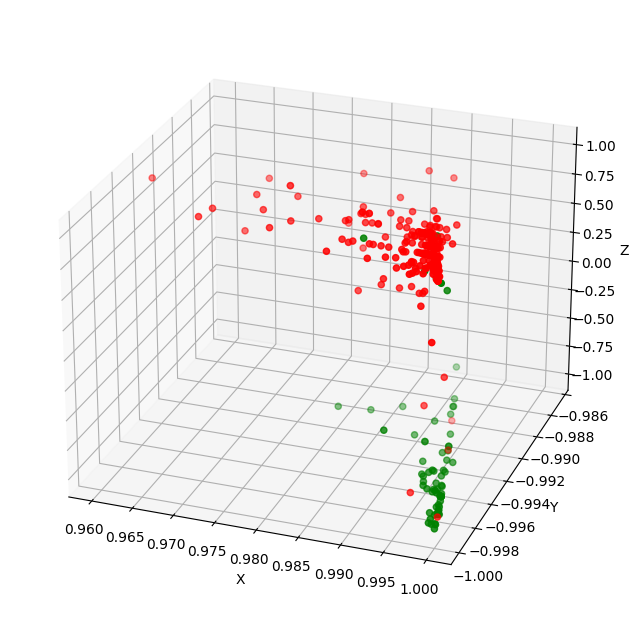

In [ ]:
# 提取h的坐标数据
x = [row[0] for row in h_1]
y = [row[1] for row in h_1]
z = [row[5] for row in h_1]

# 创建三维图形对象
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# 绘制散点图，并根据列表B的值设置不同的颜色
colors = ['red', 'blue', 'green']
label_set = set(B_1)  # 获取唯一的标签值
for label in label_set:
    indices = [i for i, value in enumerate(B_1) if value == label]
    ax.scatter([x[i] for i in indices], [y[i] for i in indices], [z[i] for i in indices], c=colors[label], marker='o')

# 设置坐标轴标签
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')


# 设置初始视角  elev表示俯仰角  azim表示方位角
ax.view_init(elev=25, azim=-70)

# 显示图形
plt.show()